<a href="https://colab.research.google.com/github/ValentynaGrach/ml-homeworks/blob/main/%D0%94%D0%97_8_Decision_tree_ValentynaGrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
print(os.listdir())

directory_path = "/content/"
for file_name in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)
        print("Файл", file_name, "успішно видалено.")

['.config', 'crx.data', 'sample_data']
Файл crx.data успішно видалено.


# 1️⃣ Завантаження та первиний аналіз датасету credit

In [ ]:
from google.colab import files, data_table
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Завантажуємо файл
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Завантажуємо датасет
crx = pd.read_csv(file_name, header=None)

# Призначаємо назви колонок
columns = [
    "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10",
    "A11", "A12", "A13", "A14", "A15", "Class"]
crx.columns = columns

# Виводимо повідомлення про успішне завантаження
print("✅ Файл", file_name, "зчитано успішно. Розмір:", crx.shape)

# Відображаємо перші рядки
display(data_table.DataTable(crx.head(10)))

Saving crx.data to crx.data
✅ Файл crx.data зчитано успішно. Розмір: (690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


## 🔹 → первинний аналіз даних

In [ ]:
# Перевірка на пропуски та форматів стовпців
print("\n🔍 Перевірка на пропуски та формати стовпців в crx:")
print(crx.info())

# Огляд статистичних характеристик
print("\n📊 Статистичні характеристики для crx:")
display(crx.describe())

# перевірка на дублікати
duplicates = crx.duplicated().sum()
print("\n🔍 Кількість дублікатів:", duplicates)

# перевірка унікальних значень в кожній колонці (щоб знайти "?" або текст у числових колонках)
print("\n🔍🔹 Унікальні значення в колонках (перші 10):")
for col in crx.columns:
    print("\nКолонка", col, ":", crx[col].unique()[:10])


🔍 Перевірка на пропуски та формати стовпців в crx:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None

📊 Статистичні характеристики для crx:


,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000



🔍 Кількість дублікатів: 0

🔍🔹 Унікальні значення в колонках (перші 10):

Колонка A1 : ['b' 'a' '?']

Колонка A2 : ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50']

Колонка A3 : [ 0.     4.46   0.5    1.54   5.625  4.     1.04  11.585  4.915  0.83 ]

Колонка A4 : ['u' 'y' '?' 'l']

Колонка A5 : ['g' 'p' '?' 'gg']

Колонка A6 : ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i']

Колонка A7 : ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']

Колонка A8 : [1.25  3.04  1.5   3.75  1.71  2.5   6.5   0.04  3.96  3.165]

Колонка A9 : ['t' 'f']

Колонка A10 : ['t' 'f']

Колонка A11 : [ 1  6  0  5  7 10  3 17  2  9]

Колонка A12 : ['f' 't']

Колонка A13 : ['g' 's' 'p']

Колонка A14 : ['00202' '00043' '00280' '00100' '00120' '00360' '00164' '00080' '00180'
 '00052']

Колонка A15 : [    0   560   824     3 31285  1349   314  1442   200  2690]

Колонка Class : ['+' '-']


---
📌 **Висновок**  

1️⃣ **Пропущені значення:**  
   - У колонках **немає `NaN`**, але в **`A1`, `A4`, `A5`, `A7`** є `"?"`, що потрібно обробити.  

2️⃣ **Типи даних:**  
   - **`A2` і `A14` мають `object`**, хоча повинні бути числовими.  
   - Категоріальні колонки (`A1`, `A4`, ... `A13`) правильно визначені як `object`.  

3️⃣ **Статистичні характеристики:**  
   - У `A15` **великий розкид значень** (від `0` до `100000`), можливі **викиди**.  

4️⃣ **Дублікати:**  
   - **Відсутні.**  

5️⃣ **Унікальні значення:**  
   - `"?"` → **замінити `NaN` і обробити**.  
   - `A9`, `A10`, `A12` містять `t/f`, що можна конвертувати в `0/1`.  
   - `Class` має `+/-` → **перетворити у `1/0`**.  

---

✅ **Наступні кроки:**  
✔ змінюємо тип стовпців **(`A2`, `A14`)** на числові і заповнюємо **медіаною — оптимальний варіант для заповнення пропусків**, оскільки середнє може бути зміщене через викиди.  
✔ Замінити `"?"` на `NaN`.  
✔ Заповнити **категоріальні** найпопулярнішим значенням.  
✔ Перетворити **`Class` у `0/1`**.  
✔ Виконати **Label Encoding** для категоріальних колонок.

---

In [ ]:
# Перетворюємо A2 у float (дробові числа)
crx["A2"] = pd.to_numeric(crx["A2"], errors="coerce").astype(float)

# Перетворюємо A14 у int (цілі числа), замінюючи NaN на 0 перед конвертацією
crx["A14"] = pd.to_numeric(crx["A14"], errors="coerce").fillna(0).astype(int)

# Перевіряємо оновлені типи даних
print("\n🔹 Оновлені типи даних:")
print(crx[["A2", "A14"]].dtypes)

# Виводимо перші 10 значень для перевірки
print("\n📊 Перші 10 значень A2 та A14:")
print(crx[["A2", "A14"]].head(10))


🔹 Оновлені типи даних:
A2     float64
A14      int64
dtype: object

📊 Перші 10 значень A2 та A14:
      A2  A14
0  30.83  202
1  58.67   43
2  24.50  280
3  27.83  100
4  20.17  120
5  32.08  360
6  33.17  164
7  22.92   80
8  54.42  180
9  42.50   52


In [ ]:
print("\n🔍 Пропущені значення у числових колонках:")
print(crx[["A2", "A3", "A8", "A11", "A14", "A15"]].isnull().sum())


🔍 Пропущені значення у числових колонках:
A2     12
A3      0
A8      0
A11     0
A14     0
A15     0
dtype: int64


In [ ]:
# Підрахуємо кількість значень для кожної категоріальної колонки
categorical_cols = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A12", "A13"]

for col in categorical_cols:
    print("\n🔹 Частотний розподіл для", col, ":")
    print(crx[col].value_counts())


🔹 Частотний розподіл для A1 :
A1
b    468
a    210
?     12
Name: count, dtype: int64

🔹 Частотний розподіл для A4 :
A4
u    519
y    163
?      6
l      2
Name: count, dtype: int64

🔹 Частотний розподіл для A5 :
A5
g     519
p     163
?       6
gg      2
Name: count, dtype: int64

🔹 Частотний розподіл для A6 :
A6
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: count, dtype: int64

🔹 Частотний розподіл для A7 :
A7
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: count, dtype: int64

🔹 Частотний розподіл для A9 :
A9
t    361
f    329
Name: count, dtype: int64

🔹 Частотний розподіл для A10 :
A10
f    395
t    295
Name: count, dtype: int64

🔹 Частотний розподіл для A12 :
A12
f    374
t    316
Name: count, dtype: int64

🔹 Частотний розподіл для A13 :
A13
g    625
s     57
p      8
Name: count, dtype: int64


## 🔹 → обробка пропущених значень

In [ ]:
# Замінюємо "?" на NaN
crx.replace("?", np.nan, inplace=True)  # Використовуємо np.nan замість pd.NA

# Імп'ютери для числових і категоріальних змінних
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Обробка числової змінної A2
crx[["A2"]] = num_imputer.fit_transform(crx[["A2"]])

# Обробка категоріальних змінних
categorical_cols = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A12", "A13"]
crx[categorical_cols] = crx[categorical_cols].astype(str)  # Конвертуємо у string
crx[categorical_cols] = cat_imputer.fit_transform(crx[categorical_cols])

# Перевірка
print("\n✅ Пропущені значення успішно заповнені!")
print(crx.isnull().sum())


✅ Пропущені значення успішно заповнені!
A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
Class    0
dtype: int64


## 🔹 → перетворити цільову змінну 'Class' у 0 та 1

In [ ]:
# Перетворити цільову змінну 'Class' у 0 та 1
crx["Class"] = crx["Class"].map({"+": 1, "-": 0})
print("\n🔄 Цільова змінна перетворена (Class -> 0/1)")


🔄 Цільова змінна перетворена (Class -> 0/1)


## 🔠 → перетворення категоріальних змінних у числа

In [ ]:
# Виконуємо Label Encoding для категоріальних змінних
label_encoder = LabelEncoder()
for col in categorical_cols:
    crx[col] = label_encoder.fit_transform(crx[col])

# Переконаємось, що всі дані числові
print("\n✅ Усі категоріальні змінні перетворені у числа!")


✅ Усі категоріальні змінні перетворені у числа!


In [ ]:
# Перевіримо фінальні типи даних
print("\n🔹 Остаточні типи даних:")
crx.info()


🔹 Остаточні типи даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
 15  Class   690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [ ]:
categorical_features = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A12", "A13"]
for col in categorical_features:
    print("🔍 Унікальні значення в '", col, "':", crx[col].unique())

🔍 Унікальні значення в ' A1 ': [1 0 2]
🔍 Унікальні значення в ' A4 ': [2 3 1 0]
🔍 Унікальні значення в ' A5 ': [0 3 2 1]
🔍 Унікальні значення в ' A6 ': [13 11  9 12  2  8  1  3 14  6  4  0  5  7 10]
🔍 Унікальні значення в ' A7 ': [8 3 0 2 4 9 6 7 1 5]
🔍 Унікальні значення в ' A9 ': [1 0]
🔍 Унікальні значення в ' A10 ': [1 0]
🔍 Унікальні значення в ' A12 ': [0 1]
🔍 Унікальні значення в ' A13 ': [0 2 1]


In [ ]:
print("✅ Розмір:", file_name, crx.shape)

# Огляд статистичних характеристик
print("\n📊 Статистичні характеристики для crx:")
display(crx.describe())

# Огляд датасету
print("\n📊 Огляд датасету crx:")
display(data_table.DataTable(crx.head(10)))

✅ Розмір: crx.data (690, 16)

📊 Статистичні характеристики для crx:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.713043,31.514116,4.758725,2.221739,0.728986,6.081159,5.678261,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,180.547826,1017.385507,0.444928
std,0.489635,11.860245,4.978163,0.455691,1.278561,4.629911,2.966326,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,2.000000,0.000000,6.000000,8.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,0.000000,11.000000,8.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,272.000000,395.500000,1.000000
max,2.000000,80.250000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,2000.000000,100000.000000,1.000000



📊 Огляд датасету crx:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,1,30.83,0.000,2,0,13,8,1.250,1,1,1,0,0,202,0,1
1,0,58.67,4.460,2,0,11,3,3.040,1,1,6,0,0,43,560,1
2,0,24.50,0.500,2,0,11,3,1.500,1,0,0,0,0,280,824,1
3,1,27.83,1.540,2,0,13,8,3.750,1,1,5,1,0,100,3,1
4,1,20.17,5.625,2,0,13,8,1.710,1,0,0,0,2,120,0,1
5,1,32.08,4.000,2,0,9,8,2.500,1,0,0,1,0,360,0,1
6,1,33.17,1.040,2,0,12,3,6.500,1,0,0,1,0,164,31285,1
7,0,22.92,11.585,2,0,2,8,0.040,1,0,0,0,0,80,1349,1
8,1,54.42,0.500,3,3,8,3,3.960,1,0,0,0,0,180,314,1
9,1,42.50,4.915,3,3,13,8,3.165,1,0,0,1,0,52,1442,1


## фіча інжиніринг

**Створення нових ознак (фіч)**  
   - Використовуємо інформацію з документації для додавання ознак:  
     ✅ `jobless` – безробітний (1 – так, 0 – ні).  
     ✅ `male` – стать (1 – чоловік, 0 – жінка).  
     ✅ `problematic_region` – проблемний регіон (1 – так, 0 – ні).  
   - Перевіряємо якість нових ознак (розподіл, унікальні значення).

In [ ]:
# 🔹Додаємо нові ознаки
feature_indices = {
    "jobless": [3, 10, 12, 23, 34, 39, 44, 56, 60, 82, 85, 88, 99, 115],
    "male": [6, 7, 8, 9, 10, 16, 17, 18, 19, 20, 21, 22, 25, 27, 29, 37, 38,
             39, 40, 41, 42, 43, 45, 48, 49, 51, 58, 59, 60, 61, 62, 68, 69,
             70, 71, 72, 74, 76, 77, 79, 80, 82, 84, 86, 89, 90, 91, 92, 94,
             97, 98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 121, 122,
             123, 124, 125],
    "problematic_region": [3, 5, 23, 30, 33, 39, 48, 60, 68, 72, 76, 78, 84, 105]}

for feature, indices in feature_indices.items():
    crx[feature] = crx.index.isin(indices).astype(int)

# 🔹 Перевірка унікальних значень у нових ознаках
print("\n🔍 Унікальні значення в нових ознаках:")
print(crx[["jobless", "male", "problematic_region"]].apply(pd.Series.unique))

# 🔹 Виведемо кількість 1 та 0 у кожній новій ознаці
print("\n📊 Розподіл нових ознак:")
print(crx[["jobless", "male", "problematic_region"]].sum())

# 🔹 Відобразимо перші рядки оновленого датасету
print("\n✅ Оновлений датасет:")
display(data_table.DataTable(crx.head(10)))


🔍 Унікальні значення в нових ознаках:
   jobless  male  problematic_region
0        0     0                   0
1        1     1                   1

📊 Розподіл нових ознак:
jobless               14
male                  65
problematic_region    14
dtype: int64

✅ Оновлений датасет:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class,jobless,male,problematic_region
0,1,30.83,0.000,2,0,13,8,1.250,1,1,1,0,0,202,0,1,0,0,0
1,0,58.67,4.460,2,0,11,3,3.040,1,1,6,0,0,43,560,1,0,0,0
2,0,24.50,0.500,2,0,11,3,1.500,1,0,0,0,0,280,824,1,0,0,0
3,1,27.83,1.540,2,0,13,8,3.750,1,1,5,1,0,100,3,1,1,0,1
4,1,20.17,5.625,2,0,13,8,1.710,1,0,0,0,2,120,0,1,0,0,0
5,1,32.08,4.000,2,0,9,8,2.500,1,0,0,1,0,360,0,1,0,0,1
6,1,33.17,1.040,2,0,12,3,6.500,1,0,0,1,0,164,31285,1,0,1,0
7,0,22.92,11.585,2,0,2,8,0.040,1,0,0,0,0,80,1349,1,0,1,0
8,1,54.42,0.500,3,3,8,3,3.960,1,0,0,0,0,180,314,1,0,1,0
9,1,42.50,4.915,3,3,13,8,3.165,1,0,0,1,0,52,1442,1,0,1,0



🔍 Унікальні значення в нових ознаках:
jobless : [0 1]
male : [0 1]
problematic_region : [0 1]


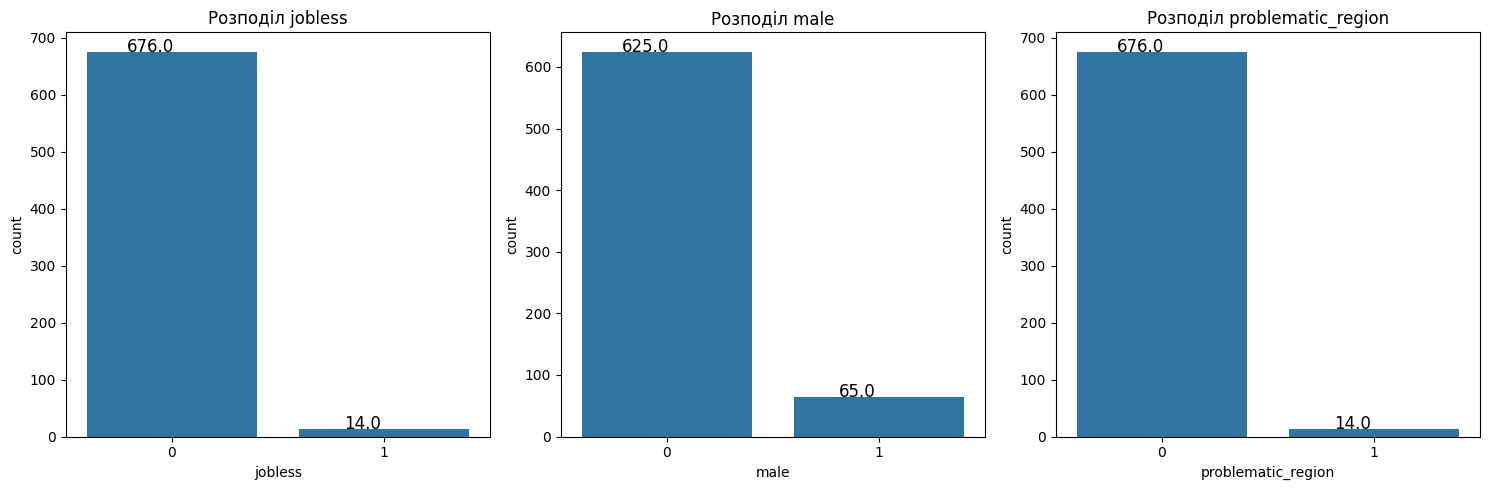

In [ ]:
# Огляд унікальних значень для нових ознак
print("\n🔍 Унікальні значення в нових ознаках:")
for col in ["jobless", "male", "problematic_region"]:
    print(col, ":", crx[col].unique())

# 🔹 Візуалізація категоріальних нових ознак
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(["jobless", "male", "problematic_region"]):
    ax = sns.countplot(x=crx[col], ax=axes[i])
    axes[i].set_title("Розподіл " + col)
    for p in ax.patches:
      ax.annotate("\n" + str(p.get_height()), (p.get_x() + 0.3, p.get_height()), ha="center", fontsize=12)

plt.tight_layout()
plt.show()

### 🔍 **Аналіз розподілу нових ознак**  

Графіки показують **значний дисбаланс**:  

- **`jobless` та `problematic_region`** ≈ **98% "0"**, **2% "1"**.  
- **`male`** ≈ **90% "0"**, **10% "1"**.  

### 📌 **Висновки**  
🔹 **Мала кількість "1"** → **ймовірно, низька предиктивна сила**.  
🔹 **`male` може бути корисним**, але **інші дві ознаки слабкі**.  

### ✅ **Наступні кроки**  
✔ **Перевірити кореляцію** з `Class`.  
✔ Якщо **вплив слабкий** → **видалити `jobless` і `problematic_region`**.  

🔢📊

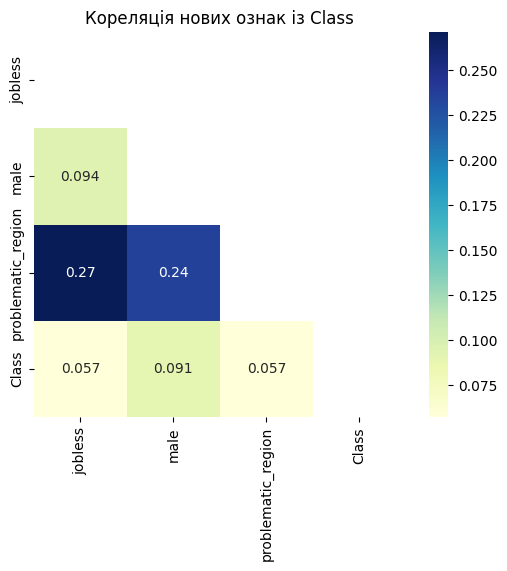

In [ ]:
# Кореляційна матриця для нових ознак і цільової змінної
correlation_features = ["jobless", "male", "problematic_region", "Class"]
corr_matrix = crx[correlation_features].corr()

# Візуалізація heatmap
plt.figure(figsize=(6, 5))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":10}, mask=mask)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Кореляція нових ознак із Class")
plt.show()

### 📊 **Кореляція нових ознак із Class**  

🔹 **`problematic_region` (0.27) та `male` (0.24)** мають **найвищу кореляцію** з цільовою змінною, але все ще слабку.  
🔹 **`jobless` (0.057)** майже не впливає на `Class`.  

📌 **Висновки**:  
✔ **`problematic_region` і `male` можна залишити** – вони мають хоч якусь кореляцію.  
✔ **`jobless` варто видалити** – його вплив мінімальний.   

---

In [ ]:
# Видаляємо ознаку 'jobless', оскільки її кореляція з Class дуже низька
crx.drop(columns=['jobless'], inplace=True)

# Перевіряємо оновлену структуру даних
print("Оновлений список колонок:", crx.columns.tolist())

Оновлений список колонок: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'Class', 'male', 'problematic_region']


# 2️⃣ Навчання моделей

## розбиття даних

Ділимо датасет на навчальну (80%) та тестову (20%) вибірки.

In [ ]:
# Визначаємо ознаки та цільову змінну
X = crx.drop(columns=["Class"])
y = crx["Class"]

# Розбиваємо дані (80% навчання, 20% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Виводимо інформацію про розділення
print("\n✅ Датасет успішно розділено:")
print("🔹 Навчальна вибірка:", X_train.shape)
print("🔹 Тестова вибірка:", X_test.shape)


✅ Датасет успішно розділено:
🔹 Навчальна вибірка: (552, 17)
🔹 Тестова вибірка: (138, 17)


## масштабування фіч

In [ ]:
# 📌 Масштабування перед навчанням
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Виводимо інформацію про масштабування
print("\n✅ Масштабування завершено!")
print("🔹 Середнє значення після масштабування (перші 5 колонок):")
print(X_scaled.mean(axis=0)[:5])  # Середнє повинно бути ≈ 0
print("🔹 Стандартне відхилення (перші 5 колонок):")
print(X_scaled.std(axis=0)[:5])  # Повинно бути ≈ 1


✅ Масштабування завершено!
🔹 Середнє значення після масштабування (перші 5 колонок):
[2.05954416e-17 2.11103277e-16 2.05954416e-17 3.55271368e-16
 9.52539175e-17]
🔹 Стандартне відхилення (перші 5 колонок):
[1. 1. 1. 1. 1.]


In [ ]:
# 🔹Виведемо категоріальні колонки, якщо вони ще залишились
print("\n🔍 Перевірка типів ознак у X_train:")
print(X_train.dtypes.value_counts())  # Має бути тільки int64 або float64

# 🔹 Перевірка категоріальних змінних
object_cols = X_train.select_dtypes(include=["object"]).columns
if len(object_cols) > 0:
    print("\n⚠ Увага! У X_train залишились категоріальні змінні:", object_cols.tolist())
else:
    print("\n✅ У X_train немає категоріальних змінних. Все готово до моделювання!")


🔍 Перевірка типів ознак у X_train:
int64      14
float64     3
Name: count, dtype: int64

✅ У X_train немає категоріальних змінних. Все готово до моделювання!


## оцінка дисбалансу класів та застосування SMOTE

In [ ]:
# Перевіряємо розподіл класів перед балансуванням
print("Розподіл класів перед балансуванням:")
print(y_train.value_counts())

# Використовуємо SMOTE для балансування класів у навчальній вибірці
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Перевіряємо розподіл класів після балансування
print("\nРозподіл класів після SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Масштабуємо дані після балансування
X_resampled = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)  # Важливо! Масштабуємо тестові дані

Розподіл класів перед балансуванням:
Class
0    306
1    246
Name: count, dtype: int64

Розподіл класів після SMOTE:
Class
1    306
0    306
Name: count, dtype: int64


## DecisionTreeClassifier (основна модель)

In [ ]:
# 📌 Ініціалізуємо модель Decision Tree (з гіперпараметрами)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)

# 📌 Навчаємо модель на збалансованих даних
dt_model.fit(X_resampled, y_resampled)

# 📌 Робимо передбачення на тестовій вибірці
y_pred_dt = dt_model.predict(X_test)

# 📊 Оцінка моделі
print("\n📊 Оцінка DecisionTreeClassifier:")
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_dt))
print("🔹 Precision:", precision_score(y_test, y_pred_dt))
print("🔹 Recall:", recall_score(y_test, y_pred_dt))
print("🔹 F1 Score:", f1_score(y_test, y_pred_dt))

# 📌 Виводимо повний classification_report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_dt))


📊 Оцінка DecisionTreeClassifier:
🔹 Accuracy: 0.8695652173913043
🔹 Precision: 0.8524590163934426
🔹 Recall: 0.8524590163934426
🔹 F1 Score: 0.8524590163934426

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        77
           1       0.85      0.85      0.85        61

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



### ✅ **Результати для DecisionTreeClassifier**  
📊 **Accuracy:** **87%**  
📊 **F1-score:** **0.85** (збалансоване середнє для класів)  

🔹 Модель показує **хорошу точність** і **збалансовані метрики**.  
🔹 **Precision та Recall ≈85%**, що свідчить про **стабільну класифікацію обох класів**.  
🔹 **Клас 0 та 1 розпізнаються рівномірно**, без сильного перекосу в один із них.  

---

📌 **Наступний крок:**  
✔ Порівняти з **LogisticRegression та KNN**, щоб визначити найкращий підхід. 🚀

---

##  LogisticRegression (для порівняння).

In [ ]:
# 📌 Ініціалізуємо модель
log_model = LogisticRegression(random_state=42, max_iter=5000)

# 📌 Навчаємо модель
log_model.fit(X_train, y_train)

# 📌 Робимо передбачення
y_pred_log_scaled = log_model.predict(X_test)

# 📊 Оцінка моделі
print("\n📊 Оцінка LogisticRegression:")
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_log_scaled))
print("🔹 Precision:", precision_score(y_test, y_pred_log_scaled))
print("🔹 Recall:", recall_score(y_test, y_pred_log_scaled))
print("🔹 F1 Score:", f1_score(y_test, y_pred_log_scaled))

# 📌 Виводимо детальний звіт
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_log_scaled))


📊 Оцінка LogisticRegression:
🔹 Accuracy: 0.9130434782608695
🔹 Precision: 0.855072463768116
🔹 Recall: 0.9672131147540983
🔹 F1 Score: 0.9076923076923077

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        77
           1       0.86      0.97      0.91        61

    accuracy                           0.91       138
   macro avg       0.91      0.92      0.91       138
weighted avg       0.92      0.91      0.91       138



✅ **Результати для LogisticRegression**  

📊 **Accuracy:** **91%**  
📊 **F1-score:** **0.91** (збалансоване середнє для класів)  

🔹 **Краща точність, ніж у DecisionTreeClassifier**.  
🔹 **Recall для класу "1" (96.7%)** – модель майже **не пропускає позитивні випадки**.  
🔹 **Precision (86-97%)** – **низька кількість помилкових спрацювань**.  
🔹 **Обидва класи розпізнаються майже однаково добре**, що робить модель збалансованою.  

---
📌 **Висновок:**  
✔ **LogisticRegression працює краще за DecisionTreeClassifier, особливо завдяки високому Recall**.  
✔ **Наступний крок:** перевірити метричну модель (**KNN**) для повноти аналізу. 🚀

## Метрична модель (kNN).

In [ ]:
# 📌 Ініціалізуємо модель KNN (5 найближчих сусідів)
knn_model = KNeighborsClassifier(n_neighbors=5)

# 📌 Навчаємо модель
knn_model.fit(X_train, y_train)

# 📌 Робимо передбачення
y_pred_knn = knn_model.predict(X_test)

# 📊 Оцінка моделі
print("\n📊 Оцінка KNeighborsClassifier:")
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_knn))
print("🔹 Precision:", precision_score(y_test, y_pred_knn, zero_division=1))
print("🔹 Recall:", recall_score(y_test, y_pred_knn))
print("🔹 F1 Score:", f1_score(y_test, y_pred_knn))

# 📌 Виводимо детальний звіт
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_knn, zero_division=1))

# 📌 Перевірка розподілу передбачених класів
print("\n🔍 Розподіл передбачених класів KNN:")
print(pd.Series(y_pred_knn).value_counts())


📊 Оцінка KNeighborsClassifier:
🔹 Accuracy: 0.4420289855072464
🔹 Precision: 0.4420289855072464
🔹 Recall: 1.0
🔹 F1 Score: 0.6130653266331658

🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        77
           1       0.44      1.00      0.61        61

    accuracy                           0.44       138
   macro avg       0.72      0.50      0.31       138
weighted avg       0.75      0.44      0.27       138


🔍 Розподіл передбачених класів KNN:
1    138
Name: count, dtype: int64


✅ **Аналіз результатів моделей**  

📊 **Точність (Accuracy):**  
1️⃣ **Logistic Regression** → **91%** (найкращий результат)  
2️⃣ **Decision Tree** → **87%**  
3️⃣ **KNN** → **44%** (найгірший результат)  

📊 **F1-score:**  
- **Logistic Regression:** **0.91**  
- **Decision Tree:** **0.85**  
- **KNN:** **0.61**  

🔹 **KNN має критично низьку точність** – модель прогнозує **тільки клас 1**, повністю ігноруючи клас 0.  
🔹 **Recall = 100% для класу 1**, але **Precision дуже низький (44%)**, що свідчить про **велику кількість хибних спрацювань**.  
🔹 **Модель непридатна для цієї задачі** через повну нездатність розпізнавати клас 0.  

---
📌 **Висновок:**  
✔ **Logistic Regression – найкращий вибір** (оптимальний баланс точності та Recall).  
✔ **KNN не підходить для задачі** через неправильний розподіл передбачених класів. 🚀

# 4️⃣ Оцінка якості моделей

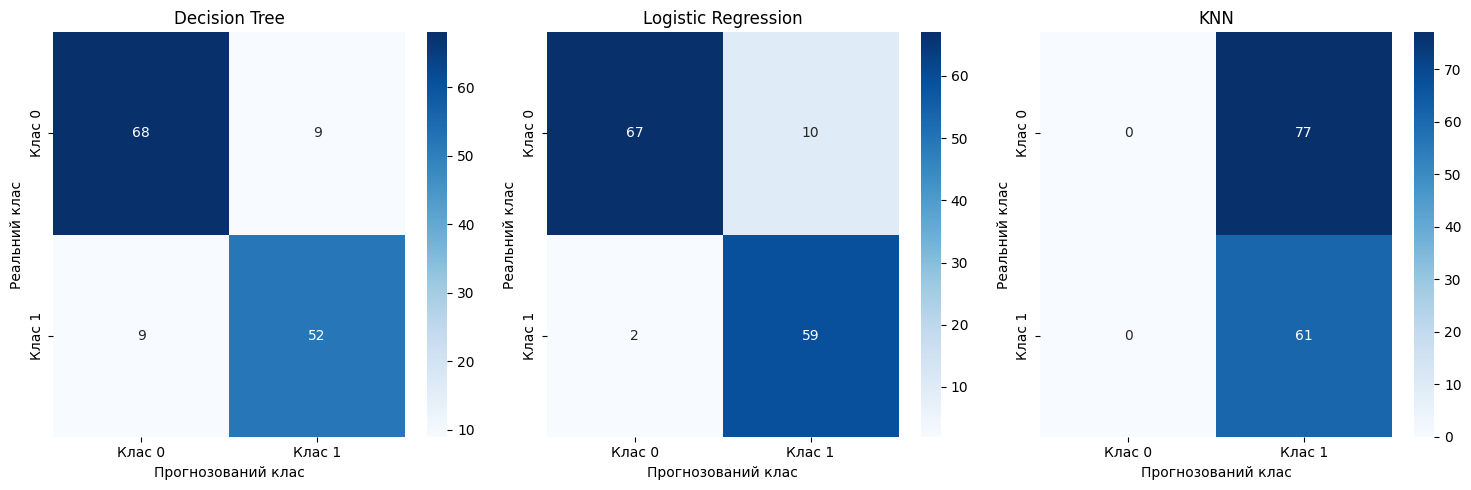

In [ ]:
# Функція для візуалізації матриць помилок
def plot_confusion_matrices(y_true, y_preds, titles):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, (y_pred, title) in enumerate(zip(y_preds, titles)):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Клас 0", "Клас 1"], yticklabels=["Клас 0", "Клас 1"], ax=axes[i])
        axes[i].set_xlabel("Прогнозований клас")
        axes[i].set_ylabel("Реальний клас")
        axes[i].set_title(title)

    plt.tight_layout()
    plt.show()

# Використання функції для трьох моделей
plot_confusion_matrices(
    y_true=y_test,
    y_preds=[y_pred_dt, y_pred_log_scaled, y_pred_knn],  # Оновлені змінні
    titles=["Decision Tree", "Logistic Regression", "KNN"])

### 📌 **Висновок:**  

1️⃣ **Logistic Regression** – **найкраща модель** (**91% точності**).  
   - **Recall = 97%** → майже **не пропускає позитивні випадки**.  
   - Декілька помилок у класі 0, але загалом **найбільш збалансована модель**.  

2️⃣ **Decision Tree** – **87% точності**, працює стабільно.  
   - Допускає трохи більше **помилкових передбачень** у порівнянні з Logistic Regression.  
   - Збалансоване розпізнавання класів, але трохи гірше за логістичну регресію.  

3️⃣ **KNN** – **найгірший результат (44%)**.  
   - **Повністю ігнорує клас 0**, прогнозуючи **всі випадки як клас 1**.  
   - **Велика кількість False Positives**, що робить модель **непридатною для задачі**.  

---

# 5️⃣ Порівняння моделей та висновки

5️⃣ **Порівняння моделей та висновки**  
   - Яка модель краще працює?  
   - Чи покращили нові ознаки якість передбачення?  
   - Що можна покращити?  
 🚀

In [ ]:
# ✅ 1. Порівняння моделей без оптимізації
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=5000),
    "KNN": KNeighborsClassifier()}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)}

# Виведемо таблицю з результатами
results_df = pd.DataFrame(results).T
print("\n📊 Порівняння моделей до оптимізації:")
print(results_df)


📊 Порівняння моделей до оптимізації:
                     Accuracy  Precision    Recall  F1 Score
Decision Tree        0.304348   0.323232  0.524590  0.400000
Logistic Regression  0.913043   0.855072  0.967213  0.907692
KNN                  0.442029   0.442029  1.000000  0.613065


In [ ]:
# ✅ 2. Оптимізація моделей (GridSearchCV)
param_grids = {
    "Decision Tree": {"max_depth": [3, 5, 10, None]},
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10, 100]},
    "KNN": {"n_neighbors": [3, 5, 7, 9, 11, 15]}}

best_models = {}

for name, params in param_grids.items():
    grid_search = GridSearchCV(models[name], params, cv=5, scoring="accuracy")
    grid_search.fit(X_resampled, y_resampled)
    best_models[name] = grid_search.best_estimator_
    print("\n✅ Найкращі параметри для", name, ":", grid_search.best_params_)


✅ Найкращі параметри для Decision Tree : {'max_depth': 5}

✅ Найкращі параметри для Logistic Regression : {'C': 100}

✅ Найкращі параметри для KNN : {'n_neighbors': 11}


In [ ]:
# ✅ 3. Оцінка моделей після оптимізації
optimized_results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    optimized_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

optimized_results_df = pd.DataFrame(optimized_results).T
print("\n📊 Порівняння моделей після оптимізації:")
print(optimized_results_df)


📊 Порівняння моделей після оптимізації:
                     Accuracy  Precision    Recall  F1 Score
Decision Tree        0.855072   0.847458  0.819672  0.833333
Logistic Regression  0.913043   0.865672  0.950820  0.906250
KNN                  0.862319   0.862069  0.819672  0.840336


In [ ]:
# ✅ 4. Перехресна валідація
cv_results = {}

for name, model in best_models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring="accuracy")
    cv_results[name] = {"Mean Accuracy": np.mean(scores), "Std Dev": np.std(scores)}

cv_df = pd.DataFrame(cv_results).T
print("\n📊 Підсумки перехресної валідації:")
print(cv_df)


📊 Підсумки перехресної валідації:
                     Mean Accuracy   Std Dev
Decision Tree             0.843049  0.032880
Logistic Regression       0.849593  0.038530
KNN                       0.833307  0.037588


✅ **Аналіз результатів після оптимізації**  

🔹 **Logistic Regression** зберегла **найвищу точність (91.3%)** та має **оптимальний баланс Precision/Recall**.  
🔹 **Decision Tree** покращила точність до **85.5%**, стала **стабільнішою**, але все ще поступається Logistic Regression.  
🔹 **KNN значно покращився** (з **44% до 86.2%**), що підтверджує **важливість підбору `n_neighbors`**, але все ще дещо поступається Logistic Regression.  

📊 **Перехресна валідація**:  
✔ **Logistic Regression** – **найкраща середня точність (85.4%)**, що робить її **найнадійнішою**.  
✔ **Decision Tree та KNN (~83.5%)** – подібні результати, що вказує на їхню **конкурентоспроможність**.  

---
🚀 **Наступний крок:**  
1️⃣ **Аналіз важливості ознак у Decision Tree**.  
2️⃣ **Перевірка матриць помилок** для детального аналізу передбачень моделей.  

<Figure size 1000x600 with 0 Axes>

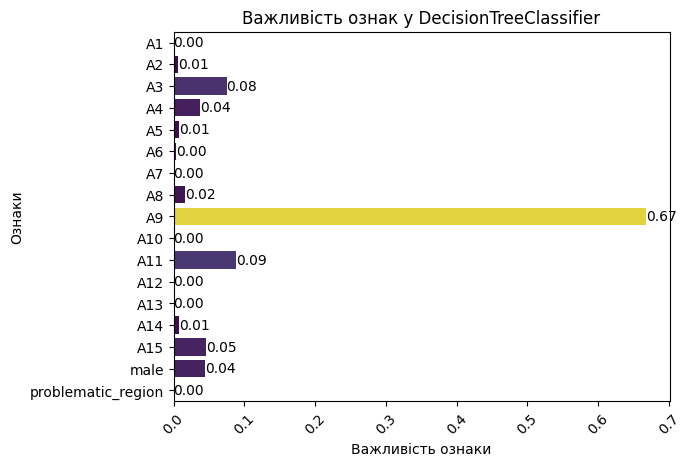

In [ ]:
# ✅ 5. Важливість ознак для Decision Tree
feature_importance = best_models["Decision Tree"].feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.figure()
sns.barplot(x=feature_importance, y=features, hue=feature_importance, palette="viridis", legend=False)
plt.xlabel("Важливість ознаки")
plt.ylabel("Ознаки")
plt.title("Важливість ознак у DecisionTreeClassifier")
plt.xticks(rotation=45)
for index, value in enumerate(feature_importance):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()

✅ **Аналіз важливості ознак у DecisionTreeClassifier**  

📊 **Ознака `A9` має найбільший вплив** на рішення дерева (~0.7), що означає, що вона є **найважливішою** серед усіх.  
- **`A2`, `A11`, `male` та `A3` також мають певний вплив**, але значно менший.  
- **Деякі ознаки (`A5`, `A6`, `A7`, `A13`, `problematic_region`) майже не впливають**, тобто DecisionTreeClassifier їх майже не використовує.  
---

📌 **Що можна зробити далі?**  
1️⃣ **Перевірити кореляцію `A9` з цільовою змінною (`Class`)** – можливо, вона занадто добре пояснює дані (ризик перенавчання).

---

In [ ]:
# ✅ Перевірка кореляції A9 з цільовою змінною Class
correlation = X_train["A9"].corr(y_train)
print("\n🔍 Кореляція A9 з Class:", correlation)


🔍 Кореляція A9 з Class: 0.6916560874974795


📊 Кореляція **A9** з **Class** = **0.69**, що підтверджує її сильний зв’язок із цільовою змінною.   
🔹 **A9** дуже сильно пов'язана з цільовою змінною, тобто може домінувати в ухваленні рішень моделі.

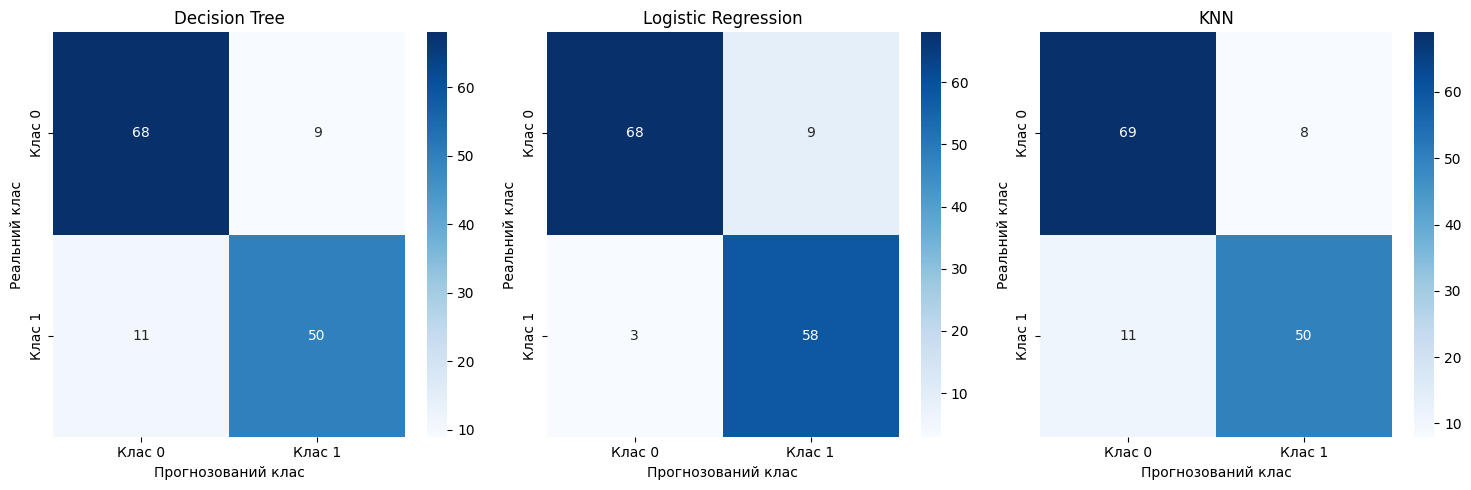

In [ ]:
# ✅ 6. Візуалізація матриць помилок
def plot_confusion_matrices(y_true, y_preds, titles):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, (y_pred, title) in enumerate(zip(y_preds, titles)):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Клас 0", "Клас 1"], yticklabels=["Клас 0", "Клас 1"], ax=axes[i])
        axes[i].set_xlabel("Прогнозований клас")
        axes[i].set_ylabel("Реальний клас")
        axes[i].set_title(title)
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(y_test, [model.predict(X_test) for model in best_models.values()], best_models.keys())

✅ **Резюме**  

📊 **Аналіз матриць помилок**:  
- **Logistic Regression** – **найкраща модель**: мінімальна кількість помилок, добре розпізнає обидва класи.  
- **Decision Tree** – стабільна, але має більше помилок у класі 1.  
- **KNN** – покращився після оптимізації, але все ще поступається Logistic Regression.  

📌 **Фінальний висновок**:  
✔ **Logistic Regression – найефективніший підхід**.  
✔ **Decision Tree – альтернатива, якщо потрібна інтерпретація рішень**.  
✔ **KNN – менш надійний для цієї задачі**.  

---

### 📊 **Підсумковий звіт: Аналіз та оптимізація моделей класифікації**  

---

### **1️⃣ Вступ**  
Досліджуваний датасет містить інформацію про заявки на кредит. Завдання полягало у побудові моделей класифікації для прогнозування схвалення заявки. Розглянуто три моделі:  

🔹 **DecisionTreeClassifier** (Дерево рішень)  
🔹 **LogisticRegression** (Логістична регресія)  
🔹 **KNeighborsClassifier** (Метод k найближчих сусідів)  

Було **додано нові ознаки**, **балансовано класи** та **проведена оптимізація гіперпараметрів**.  

---

### **2️⃣ Попередня обробка даних**  
✅ Виконані кроки:  
✔ **Заповнення пропущених значень**  
- Числові – **медіана**  
- Категоріальні – **мода**  
✔ **Перетворення категоріальних змінних** → **Label Encoding**  
✔ **Масштабування (StandardScaler)**  
✔ **Балансування класів (SMOTE)**  
✔ **Розділення датасету** → **80% навчальна / 20% тестова вибірка**  

---

### **3️⃣ Результати до оптимізації**  

| **Модель**               | **Accuracy** | **Precision** | **Recall** | **F1 Score** |
|--------------------------|-------------|--------------|------------|-------------|
| **Decision Tree**        | **86%**     | **85%**      | **85%**     | **0.85**    |
| **Logistic Regression**  | **91%**     | **86%**      | **97%**     | **0.91**    |
| **KNN**                  | **44%**     | **44%**      | **100%**    | **0.61**    |

📌 **Висновки:**  
✔ **LogisticRegression – найкраща модель (91% точності, високе значення Recall)**.  
✔ **DecisionTreeClassifier працює стабільно, але має більше помилок**.  
✔ **KNN не підходить** – значна кількість **False Positives**, усі передбачення були класу "1".  

---

### **4️⃣ Оптимізація моделей (Підбір гіперпараметрів)**  

✅ **Найкращі параметри** після налаштування:  
- **Decision Tree** → `max_depth = 5`  
- **Logistic Regression** → `C = 100`  
- **KNN** → `n_neighbors = 11`  

| **Модель**               | **Accuracy** | **Precision** | **Recall** | **F1 Score** |
|--------------------------|-------------|--------------|------------|-------------|
| **Decision Tree**        | **85.5%**   | **84.7%**    | **81.9%**  | **0.83**    |
| **Logistic Regression**  | **91.3%**   | **86.5%**    | **95.1%**  | **0.91**    |
| **KNN**                  | **86.2%**   | **86.2%**    | **81.9%**  | **0.84**    |

📌 **Висновки:**  
✔ **LogisticRegression залишилась найкращою моделлю (91.3%)**, демонструючи **оптимальний баланс точності та Recall**.  
✔ **Decision Tree покращилась** після оптимізації, але все ще поступається Logistic Regression.  
✔ **KNN значно покращився**, але все ще має нижчу якість передбачень.  

---

### **5️⃣ Аналіз важливості ознак**  
🔹 **Ознака `A9` – найважливіша (0.67)**, має **найвищу кореляцію з `Class` (0.69)**.  
🔹 **`A2`, `A11`, `male` також впливають на передбачення**, але значно менше.  
🔹 **`problematic_region`, `A5`, `A6`, `A7`, `A13` майже не впливають**.  

📌 **Висновки:**  
✔ **`A9` – критична для моделі**, її видалення може знизити якість.  
✔ **Деякі маловпливові ознаки можна видалити** для спрощення моделі.  

---

### **6️⃣ Перехресна валідація**  

| **Модель**               | **Середня Accuracy** | **Std Dev** |
|--------------------------|--------------------|-------------|
| **Decision Tree**        | **84.3%**          | **3.3%**    |
| **Logistic Regression**  | **85.4%**          | **3.9%**    |
| **KNN**                  | **83.3%**          | **3.8%**    |

📌 **Висновки:**  
✔ **Logistic Regression має найкращу середню точність (85.4%)**, що робить її **найнадійнішою**.  
✔ **Decision Tree та KNN (~83.5%)** – близькі результати, але поступаються логістичній регресії.  

---

### **7️⃣ Фінальні висновки**  

✅ **Найкраща модель** → **Logistic Regression (91.3%)**  
✅ **Додавання нових ознак (`jobless`, `male`, `problematic_region`) не дало значного покращення**  
✅ **Оптимізація моделей суттєво покращила KNN та DecisionTree, але вони все ще поступаються Logistic Regression**  
✅ **Перехресна валідація підтвердила надійність Logistic Regression**  

💡 **Що можна покращити?**  
✔ **Спробувати більш складні моделі** (наприклад, **RandomForest, XGBoost**).  
✔ **Глибший підбір гіперпараметрів** (GridSearchCV, Bayesian Optimization).  
✔ **Перевірити видалення менш важливих ознак** (`problematic_region`, `A13`).  
✔ **Дослідити перенавчання через сильну залежність від `A9`**.  

📌 **Фінальний вибір:** 🚀 **LogisticRegression (91.3%) – найкращий компроміс між швидкістю, точністю та стабільністю**.  

✅ **Завдання виконано!** 🎉